<a href="https://colab.research.google.com/github/cpvivek/Coronary-Heart-Disease-Risk-Prediction/blob/main/Capstone_Project_ML_Classification_Cardiovascular_Disease_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Capstone Project: Classification - Cardiovascular disease risk prediction. 

The objective of the project would be to predict whether a patient is under risk of contracting coronory heart disease (CHD) in the next 10 years, given the data about following 14 attributes:


• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

We have over 4000 data entries to help develop our model. 


#Dataset

Let's look into the data we have in hand.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
df=pd.read_csv('/content/drive/MyDrive/Alma Better Pro/Alma Better Pro Program/Capstone Projects/Capstone_ML_Classification_Cardiovascular risk/cardiovascular_risk.csv')

In [22]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [23]:
df.shape

(3390, 17)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

We can see some null values in the dataset which needs to be dealt with.

In [25]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


#Null value clean-up

Following are the fields null values were detected in:

1. education: Categorical variable, indicating the level of education:

  1=0-11 years

  2=High School Diploma, GED

  3=Some College, Vocational School

  4=College (BS, BA) degree or more

  Null values shall be replaced with mode

2. cigsPerDay: Continuos variable indicating number of cigarettes smoked in a day. Null values shall be replaced by median.

3. BPmeds: Categorical Field (0/1) indicating use of Anti-hypertensive medication at exam. If the value is missing here, we shall assume that the patient isn't under the medication. 

4. totChol: Continuos variable indicating Serum Total Cholesterol (mg/dL). Null values shall be replaced with median here.

5. BMI: Contiuos variable indicating BMI of the patient. Null values shall be replaced by median.

6. heartrate: Continuos variable indicating heart rate (Ventricular rate) in
beats/min. Null values to be replaced by median.

7. glucose: Continuous variable indicating Casual serum glucose (mg/dL). Null values to be replaced by median.

In [26]:
df['education'].fillna(df.education.mode(),inplace=True)
df['cigsPerDay'].fillna(df.cigsPerDay.median(),inplace=True)
df['BPMeds'].fillna(0,inplace=True)
df['totChol'].fillna(df.totChol.median(),inplace=True)
df['BMI'].fillna(df.BMI.median(),inplace=True)
df['heartRate'].fillna(df.heartRate.median(),inplace=True)
df['glucose'].fillna(df.glucose.median(),inplace=True)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

The dataset doesn't have null values anymore. We can proceed towards EDA now.

#EDA
Let's dive deep into the dataset to gain better understanding.

Let's have a pairplot overview of the dataset first

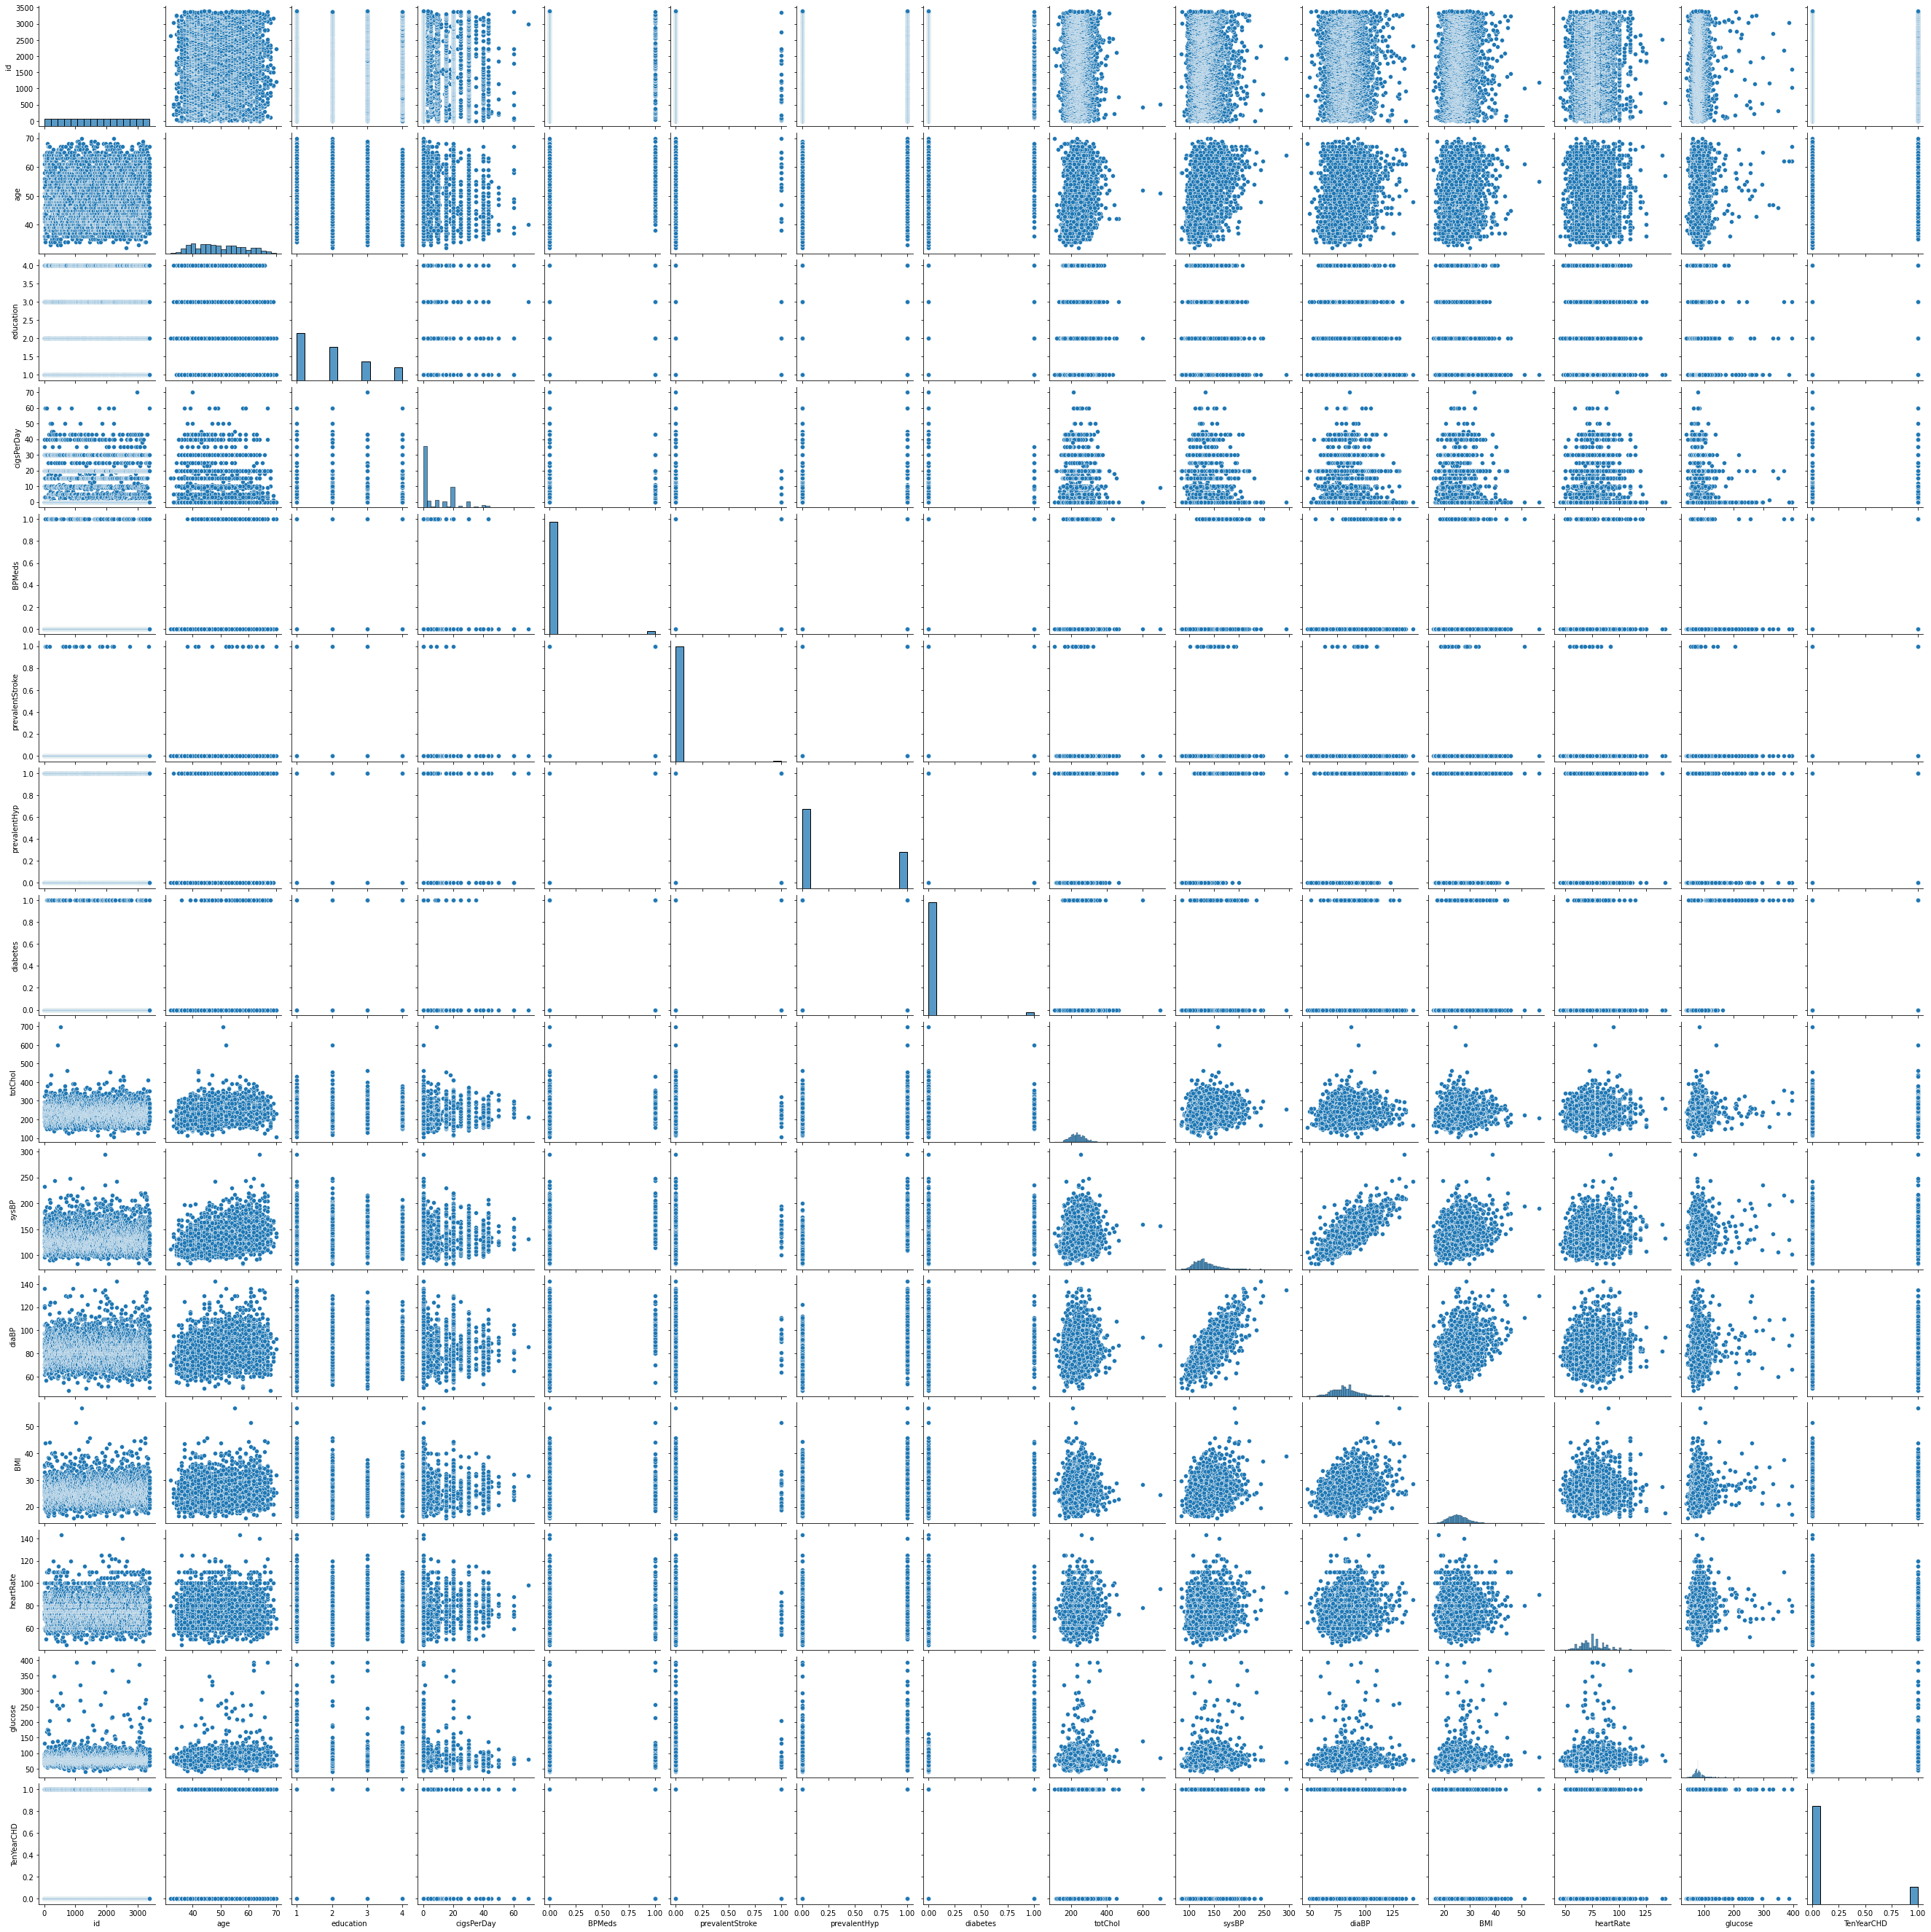

In [ ]:
sns.pairplot(df)

The pairplot can be used to look into relations between the features in the dataset.
Since this is quite messy here, let's move to look into features individualy.

## Distribution of active risk cases across ages. 

In [28]:
age_risk=df.groupby('age')['TenYearCHD'].sum().reset_index() #counting number of people having risk of CHD by age.
age_risk

,age,TenYearCHD
0,32,0
1,33,0
2,34,0
3,35,2
4,36,3
5,37,2
6,38,7
7,39,5
8,40,11
9,41,11


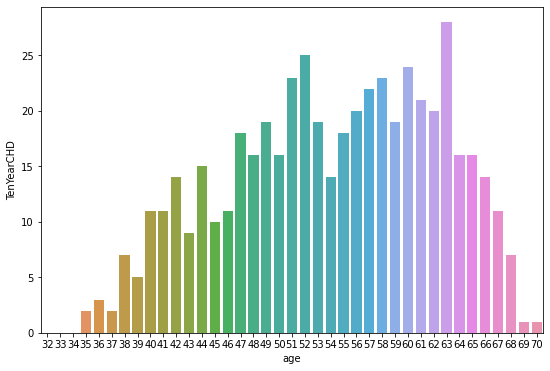

In [29]:
plt.figure(figsize=(9,6))
sns.barplot(x=age_risk.age,y=age_risk.TenYearCHD)

Remarks:
The highest number of people facing the risk of CHD are of the age 63.
Let's further break this down by gender.

In [30]:
sex_risk=df.groupby('sex')['TenYearCHD'].sum()
sex_risk

sex
F    239
M    272
Name: TenYearCHD, dtype: int64

We see that ratio of male and females facing the risk of CHD are quite equally proportionate.

In [31]:
#Lookign into CHD risk by gender, grouped by age.
male_risk=df[df.sex=='M'].groupby('age')['TenYearCHD'].sum().reset_index()
female_risk=df[df.sex=='F'].groupby('age')['TenYearCHD'].sum().reset_index()

Text(0.5, 1.0, 'Number of males facing risk of CHD by age')

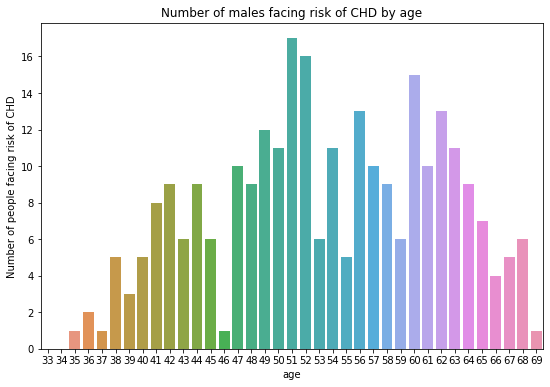

In [32]:
plt.figure(figsize=(9,6))
sns.barplot(x=male_risk.age,y=male_risk.TenYearCHD)
plt.ylabel('Number of people facing risk of CHD')
plt.title('Number of males facing risk of CHD by age')

Text(0.5, 1.0, 'Number of females facing risk of CHD by age')

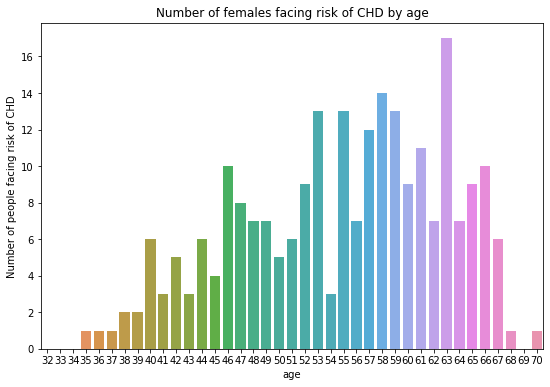

In [33]:
plt.figure(figsize=(9,6))
sns.barplot(x=female_risk.age,y=female_risk.TenYearCHD)
plt.ylabel('Number of people facing risk of CHD')
plt.title('Number of females facing risk of CHD by age')

Remarks:

Males of age 51 and females of age 63 have the highest count of CHD risk.

Let's look into the relationship between number of cigarettes consumed and risk of contracting CHD

In [34]:
cig_risk=df.groupby('cigsPerDay')['TenYearCHD'].sum().reset_index()

Text(0.5, 1.0, 'Number of cigarettes consumed per day and corresponding number of people facing risk of CHD')

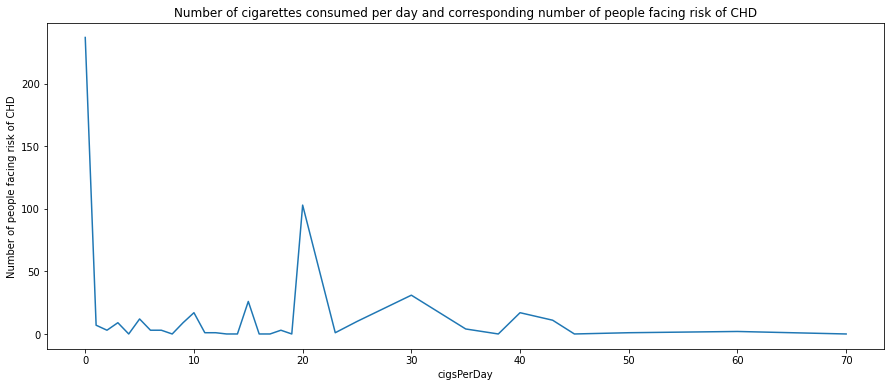

In [35]:
plt.figure(figsize=(15,6))
sns.lineplot(x=cig_risk.cigsPerDay,y=cig_risk.TenYearCHD)
plt.ylabel('Number of people facing risk of CHD')
plt.title('Number of cigarettes consumed per day and corresponding number of people facing risk of CHD')

Now this is interesting. There is a high concentration of people with risk of CHD at cigsPerDay=0. 
But let's look into the number of people facing the risk by grouping it by whether they smoke or not.

([<matplotlib.patches.Wedge at 0x7f8022580750>,
 [Text(0.13155746769569449, 1.0921046802818384, 'NonSmoker'),
  Text(-0.13155756994591333, -1.0921046679645345, 'Smoker')],
 [Text(0.07175861874310607, 0.5956934619719118, '46%'),
  Text(-0.07175867451595272, -0.5956934552533824, '54%')])

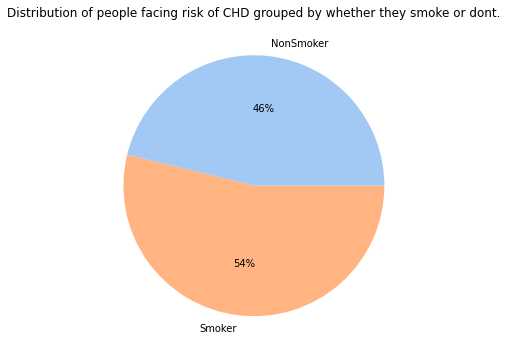

In [36]:
cig_risk2=df.groupby('is_smoking')['TenYearCHD'].sum().reset_index()
plt.figure(figsize=(15,6))
colors = sns.color_palette('pastel')[0:5]
plt.title('Distribution of people facing risk of CHD grouped by whether they smoke or dont.')
plt.pie(cig_risk2['TenYearCHD'],labels=['NonSmoker','Smoker'],colors = colors, autopct='%.0f%%')

So the number of people facing risk of CHD are more amongst those who do smoke. But it's interesting to note that a sizeable number of non smoker face similar risk too. This must mean there should be other much more influential factors contributing to CHD.


Let's look into how usage of BPMeds is associated with risk of CHD

([<matplotlib.patches.Wedge at 0x7f8022556450>,
 [Text(-1.077439005959646, 0.22164202768583932, 'Non BP Meds Consumer'),
  Text(1.0774390111475516, -0.22164200246655963, 'BP Meds Consumer')],
 [Text(-0.5876940032507159, 0.12089565146500325, '94%'),
  Text(0.5876940060804826, -0.12089563770903251, '6%')])

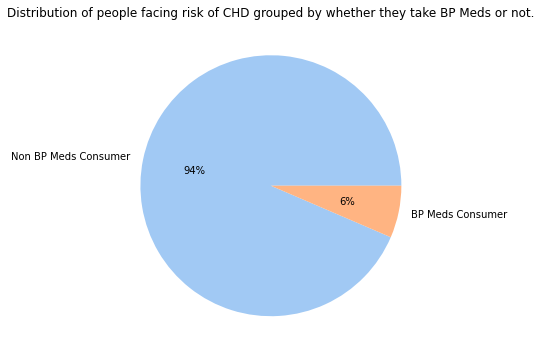

In [37]:
bpmeds_risk=df.groupby('BPMeds')['TenYearCHD'].sum().reset_index()
plt.figure(figsize=(15,6))
colors = sns.color_palette('pastel')[0:5]
plt.title('Distribution of people facing risk of CHD grouped by whether they take BP Meds or not.')
plt.pie(bpmeds_risk['TenYearCHD'],labels=['Non BP Meds Consumer','BP Meds Consumer'],colors = colors, autopct='%.0f%%')

We can see that only 6% of those facing risk of CHD consume BP Meds. So this is unlikey to be a influencing factor too.

Does presence of prevalent stroke indicate the person is still under risk?

In [38]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [39]:
prevalentstroke_risk=df.groupby('prevalentStroke')['TenYearCHD'].sum().reset_index()
prevalentstroke_risk

,prevalentStroke,TenYearCHD
0,0,501
1,1,10


Surprisingly only 10 people who have had prevalent strokes are still under the risk of CHD. 501 people who are under risk of CHD haven't had an attack yet.


In [43]:
chol_age=df.groupby('age')['totChol'].mean().reset_index()
chol_age

,age,totChol
0,32,242.000000
1,33,182.250000
2,34,197.750000
3,35,214.586207
4,36,207.440000
5,37,215.356164
6,38,213.697479
7,39,222.568345
8,40,217.148649
9,41,222.909722


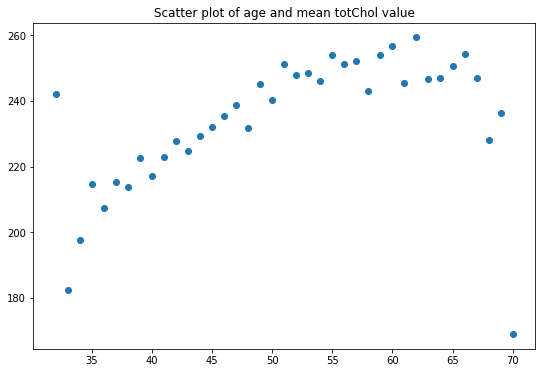

In [46]:
plt.figure(figsize=(9,6))
plt.title('Scatter plot of age and mean totChol value')
plt.scatter(chol_age.age,chol_age.totChol)
plt.show()

We can see that age and cholestrol level are possitively correlated. There are a few outliers too.

How is BMI related to risk of CHD

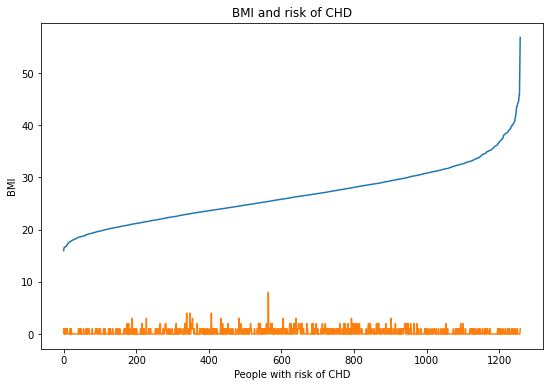

In [71]:
bmi_risk=df.groupby('BMI')['TenYearCHD'].sum().reset_index()
plt.figure(figsize=(9,6))
plt.plot(bmi_risk)
plt.xlabel('People with risk of CHD')
plt.ylabel('BMI')
plt.title('BMI and risk of CHD')
plt.show()


we can observe increase in number of people facing risk of CHD with increase in BMI. The number increases significantly in BMI range of 20-35, and stagnate beyond that.

How is BMI distributed across ages?

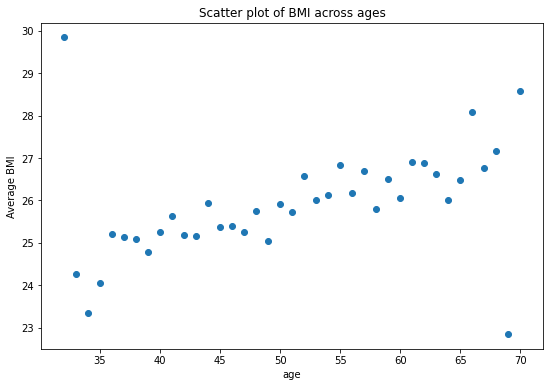

In [77]:
bmi_age=df.groupby('age')['BMI'].mean().reset_index()
plt.figure(figsize=(9,6))
plt.xlabel('age')
plt.ylabel('Average BMI')
plt.title('Scatter plot of BMI across ages')
plt.scatter(x=bmi_age.age,y=bmi_age.BMI)
plt.show()

We see that higher BMI or obesity is observed more in older population.

#Outlier Removal

Let's sort our numerical features out first

In [86]:
numerical_features=[feat for feat in df.describe(include=np.number).columns if feat not in ['TenYearCHD']]
numerical_features

['id',
 'age',
 'education',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

Let's plot boxplots to visualise the outliers

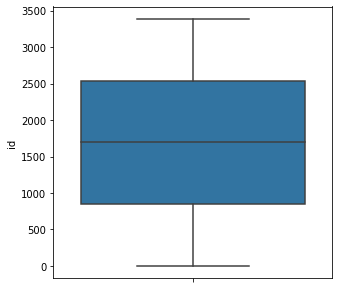

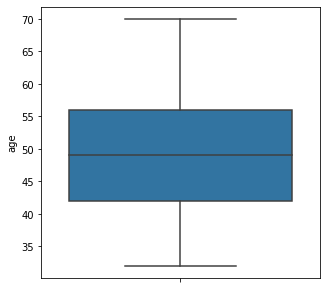

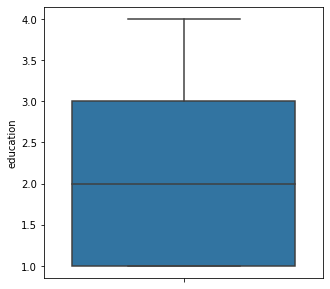

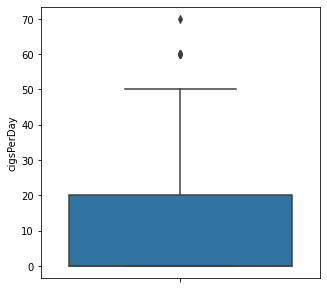

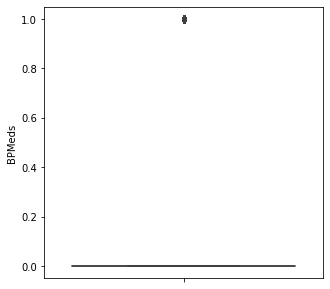

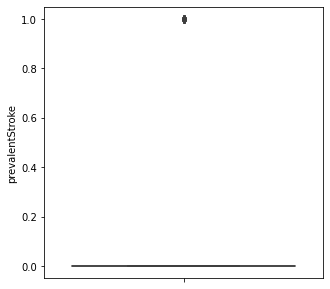

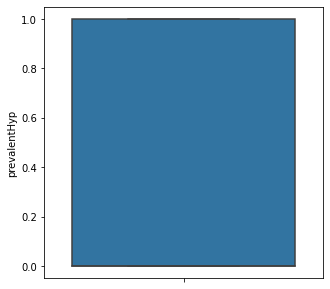

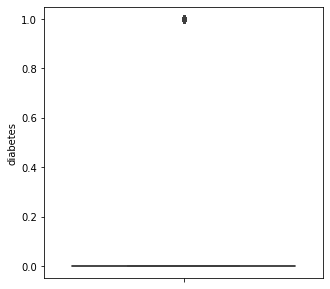

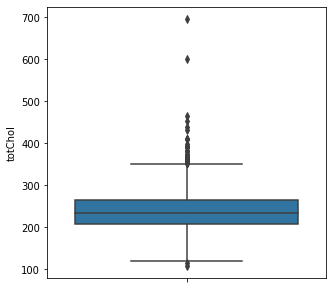

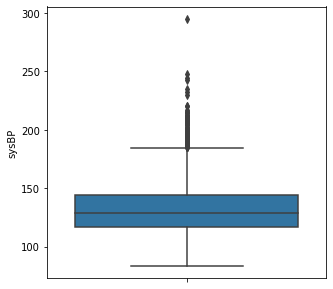

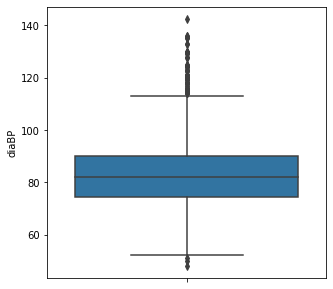

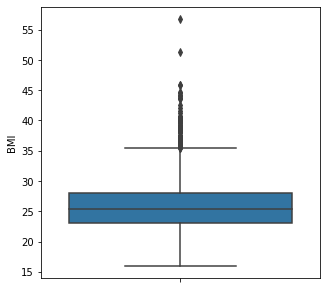

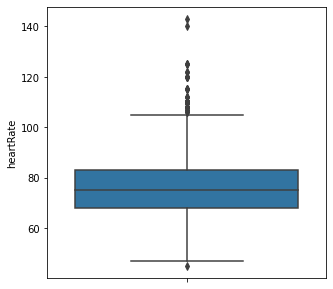

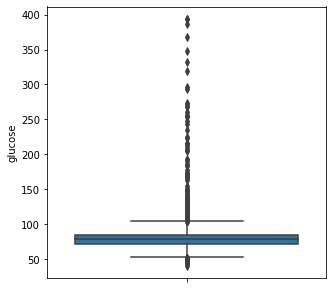

In [89]:
for col in numerical_features:
  plt.figure(figsize=(5,5))
  fig=sns.boxplot(y=df[col])
  fig.set_ylabel(col)
  
  plt.show()



We've got a pretty bad outlier situation in hand. Following are the fields where we've detected outliers in:

glucose

heartRate

BMI

diaBP

sysBP

totChol

cigsPerDay


I'll use the IQR method to filter out the outliers.

In [92]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [91]:
#we'll make a copy of the datafraem before we reomve the outliers
df_pr=df.copy()
df_pr.shape

(3390, 17)

In [102]:
outlier_cols=['heartRate','glucose','cigsPerDay','sysBP','diaBP','BMI','totChol','age']

In [128]:
for col in ['heartRate','glucose','cigsPerDay','sysBP','diaBP','BMI','totChol','age']:
  q1=df_pr[col].quantile(0.25)
  q3=df_pr[col].quantile(0.75)
  
  iqr=q3-q1

  lower_limit=q1-(1.5*iqr)
  upper_limit=q3+(1.5*iqr)

  df_pr.loc[(df_pr[col]>upper_limit)]=upper_limit
  df_pr.loc[(df_pr[col]<lower_limit)]=lower_limit


In [131]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.010619,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,81.720059,0.150737
std,978.753033,8.592878,1.019081,11.862839,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,23.161265,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [132]:
df_pr.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3323.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,1279.052655,45.876254,10.839151,15.209882,9.154130,9.157080,9.325811,9.157965,184.838791,104.924336,69.666224,28.234560,64.923156,67.754130,9.245870
std,1107.876314,8.954621,15.211411,15.234223,15.952165,15.950564,15.857796,15.950083,92.038133,41.554164,20.460027,5.889714,18.107476,19.549023,15.902038
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.875000,36.875000,36.875000,16.590000,36.875000,36.875000,0.000000
25%,37.500000,36.875000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,135.500000,94.250000,59.500000,23.592500,54.000000,55.000000,0.000000
50%,1121.500000,44.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,214.000000,119.000000,76.000000,26.640000,70.000000,74.000000,0.000000
75%,2259.750000,53.000000,36.875000,35.000000,0.000000,1.000000,1.000000,1.000000,250.000000,132.500000,85.000000,36.442500,78.000000,81.000000,1.000000
max,3389.000000,68.000000,37.500000,37.500000,37.500000,37.500000,37.500000,37.500000,355.000000,176.000000,102.500000,38.060000,96.000000,103.000000,37.500000
